# Introduction to Probability Distributions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use(['seaborn-muted','fivethirtyeight'])
sns.set_context('talk')
sales_predictions ="https://docs.google.com/spreadsheets/d/e/2PACX-1vSsu3nnH_Ppm4Ao9XUqVlUZPfTx8bGv5gNbfSavqMhPhIWp4NwaEZk3W8FgDEhEJbg12sRU_FG5EBAb/pub?output=csv"
df = pd.read_csv(sales_predictions)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


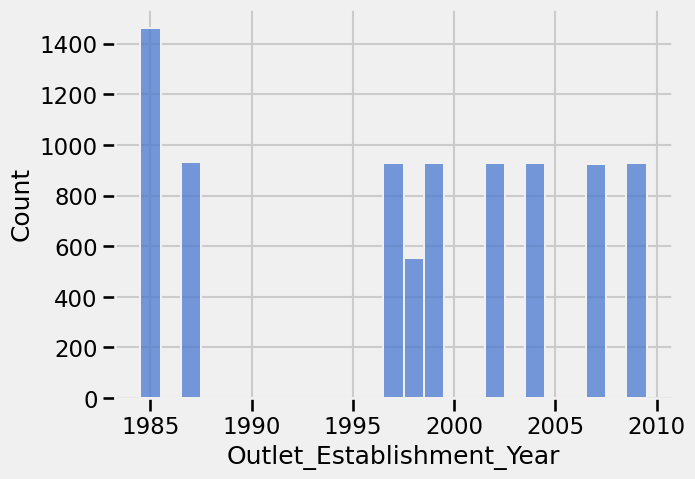

In [10]:
#Displays the counts of the outlet by Year
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete = True);

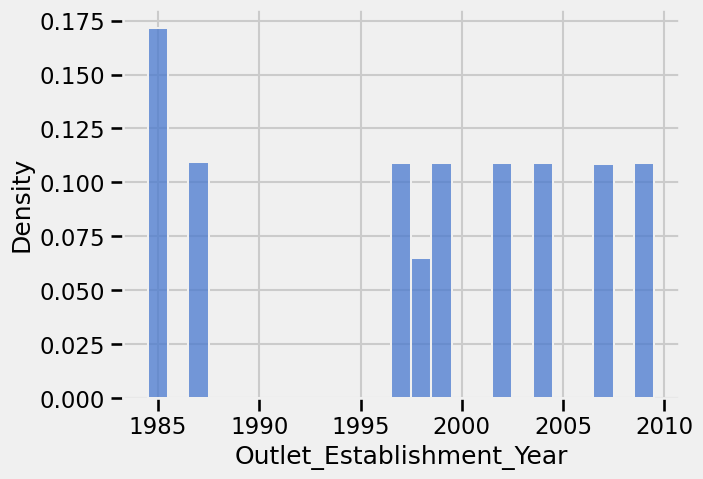

In [6]:
#Adding 'Density' will divide the raw counts by the overall number of values (n).
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, stat='density');

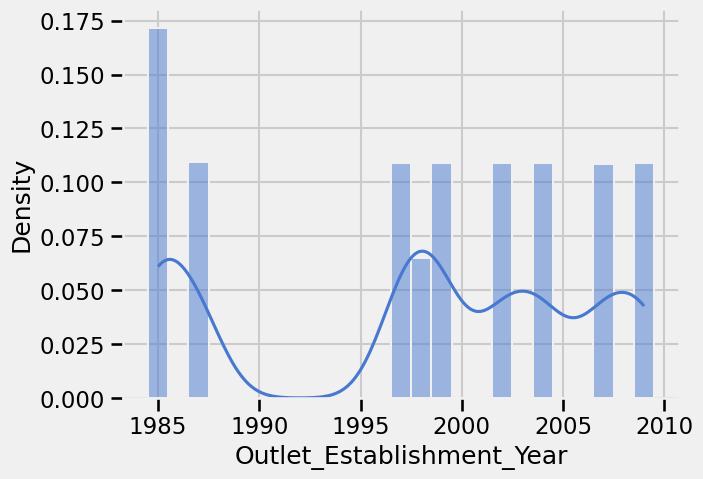

In [8]:
#Add KDE (Kernel Density estimate)
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, stat='density',kde = True);

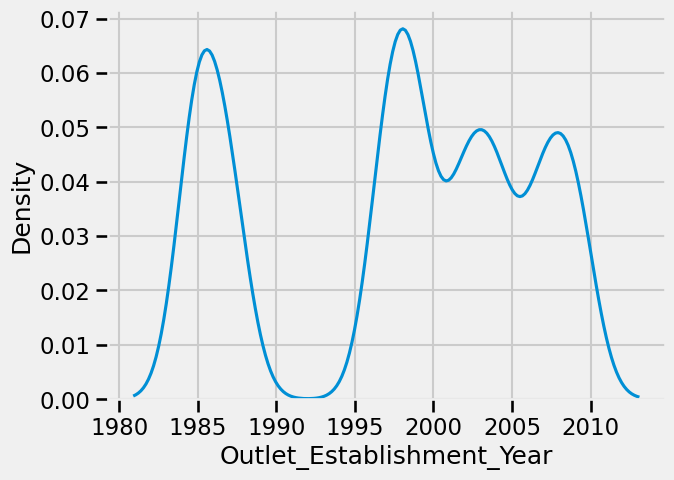

In [7]:
 sns.kdeplot(data = df, x= "Outlet_Establishment_Year");

# Measures of Central Tendency and Dispersion

In [16]:
#Central Tendency: Mean, Median, Mode
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#Dispersion: std.
df['Outlet_Establishment_Year'].std()

8.371760408092655

In [17]:
mean = df['Outlet_Establishment_Year'].mean()
std = df['Outlet_Establishment_Year'].std()
plus_one_std = mean + std
minus_one_std = mean - std

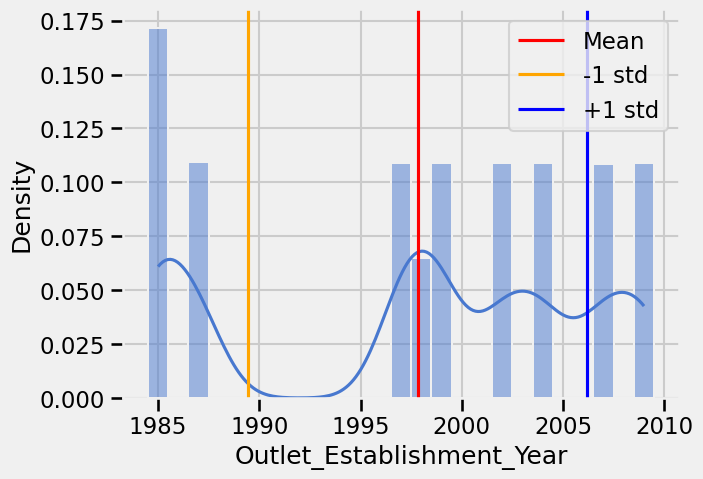

In [38]:
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, stat='density',kde = True)
plt.axvline(mean, color = 'red',label='Mean')
plt.axvline(minus_one_std, color = 'orange',label = '-1 std')
plt.axvline(plus_one_std, color = 'blue', label = '+1 std')
plt.legend();

In [24]:
#kurtosis
from scipy import stats
kurt = stats.kurtosis(df['Outlet_Establishment_Year'], fisher = False)
kurt
#indicates it's <3, this flat/platykurtic

1.7943093897163238

# Annotating Distribution Plots

In [27]:
df2 = pd.read_csv('data-2.csv', index_col = 0)
df2.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


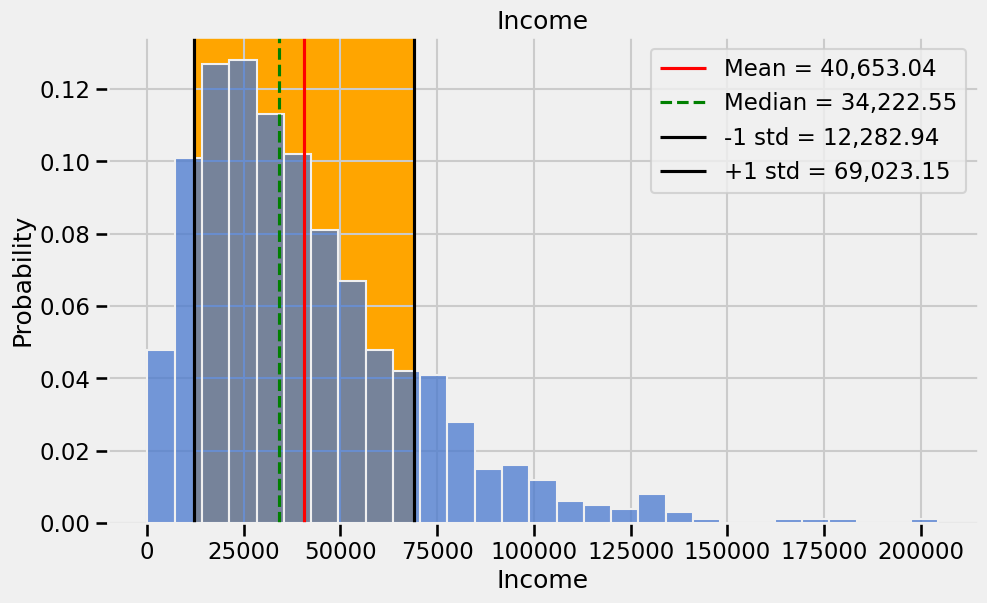

In [64]:
col = 'Income'
feature = df2[col]

mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')

ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvspan(minus_one_std, plus_one_std, color = 'orange', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [89]:
def histogram(feature):

    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    minus_one_std = mean - std
    plus_one_std = mean + std

    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature ,ax=ax,stat='probability', kde = True)

    ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvspan(minus_one_std, plus_one_std, color = 'orange', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

# Standard Normal Distribution

In [65]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [66]:
df3 = pd.read_csv('weight-height.csv')
df3.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [71]:
males = df3.loc[df3['Gender']=='Male'].copy()
females = df3.loc[df3['Gender']=='Female'].copy()
females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


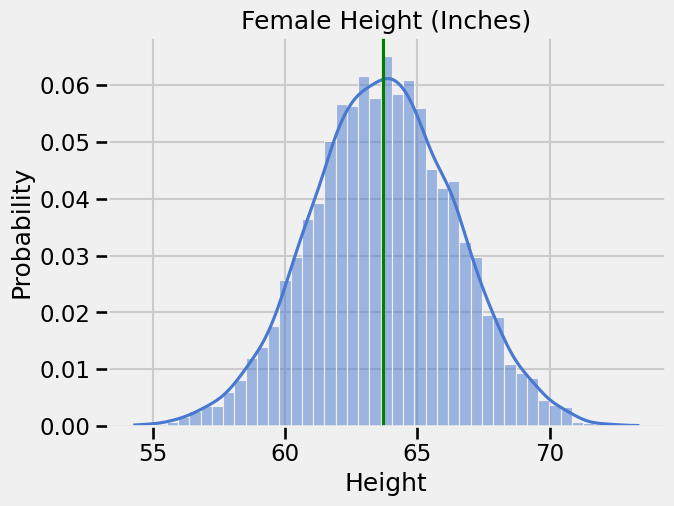

In [76]:
ax = sns.histplot(x=females['Height'],stat='probability',kde=True)
ax.axvline(females['Height'].mean(), color='g')
ax.set_title("Female Height (Inches)");

## Three ways to get z-score

In [78]:
#Manually
mean = females["Height"].mean()
std = females["Height"].std()
z_scores_manual = (females['Height'] -  mean)/std
z_scores_manual.head(3)

5000   -1.779502
5001    0.564198
5002   -0.126014
Name: Height, dtype: float64

In [79]:
#Use scipy.stats's zscore function
z_scores_scipy = stats.zscore(females['Height'])
z_scores_scipy[0:3]

5000   -1.779680
5001    0.564255
5002   -0.126027
Name: Height, dtype: float64

In [80]:
#Use scikit-learn's StandardScaler
scaler = StandardScaler()
z_scores_scaler = scaler.fit_transform(females[['Height']])
z_scores_scaler[:3]

array([[-1.77967952],
       [ 0.56425475],
       [-0.12602672]])

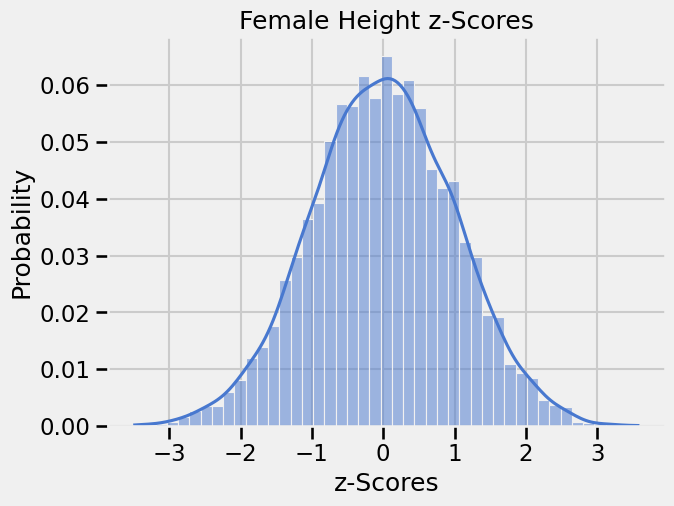

In [82]:
ax = sns.histplot(x=z_scores_scipy,stat='probability',kde=True)
ax.set_xlabel("z-Scores")
ax.set_title("Female Height z-Scores");

# Using the Normal Distribution's PDF/CDF

- Calculate the probability that a female has a height between 66.0 and 70.0 inches.

In [83]:
low_end = 66.0
high_end = 70.0

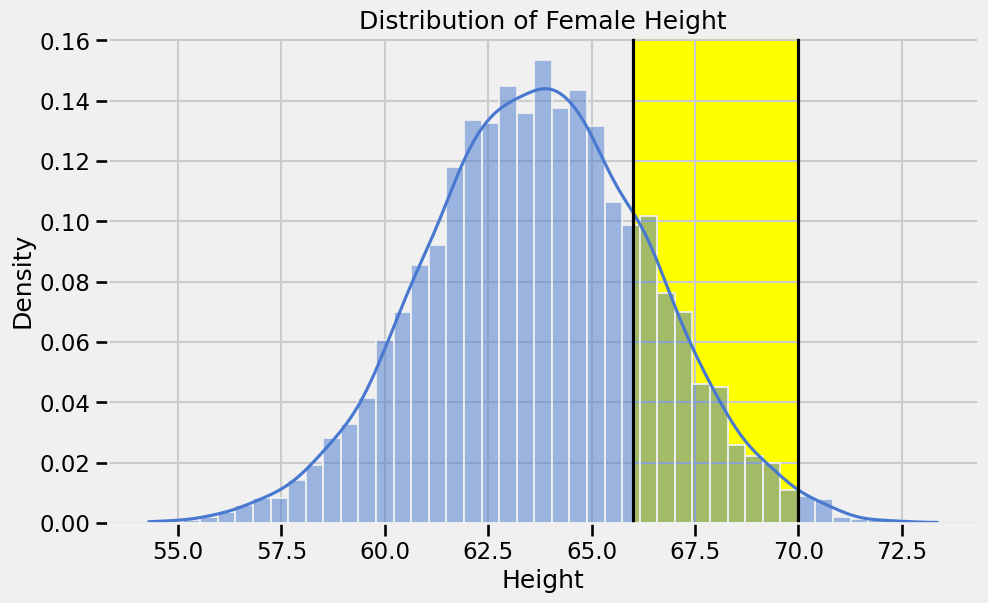

In [96]:
data = females['Height']
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [97]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

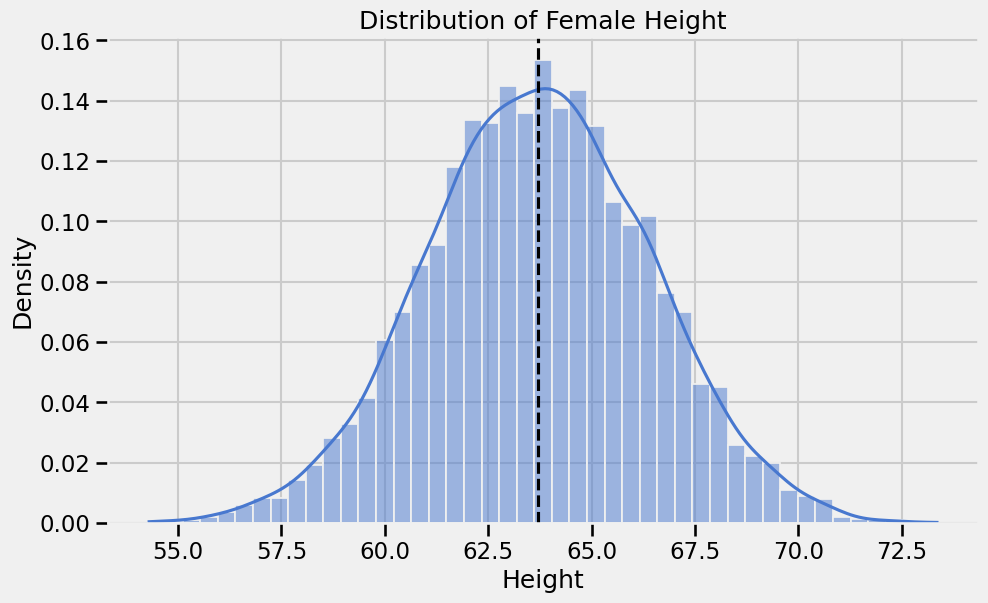

In [100]:
#Setting cumulative to False, by default already set at False
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

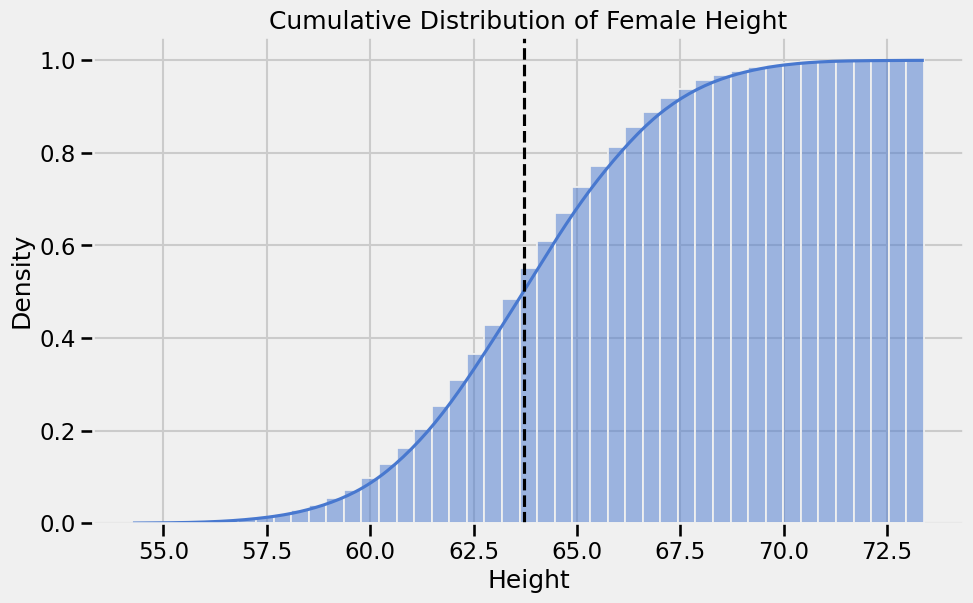

In [101]:
#Setting cumulative to True
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

## Making the normal PDF and CDF

In [102]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [ ]:
#stats.norm.pdf(range and spacing of x, the mean (defaults at 0), std (defaults at 1))
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

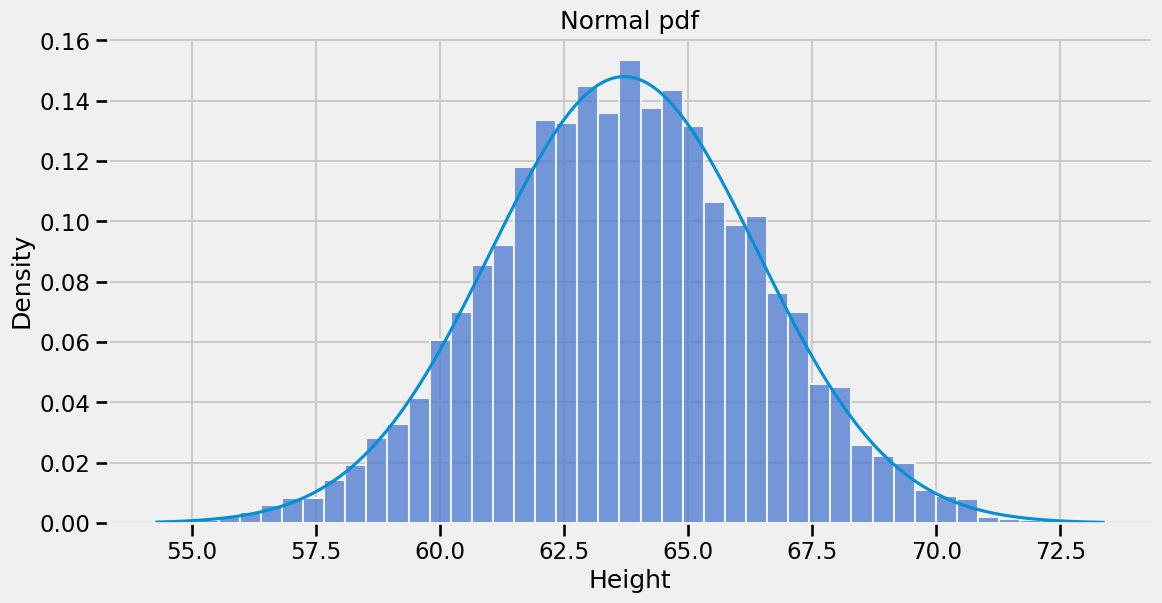

In [104]:
#The difference is the kde is smoother, this pdf
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

In [106]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

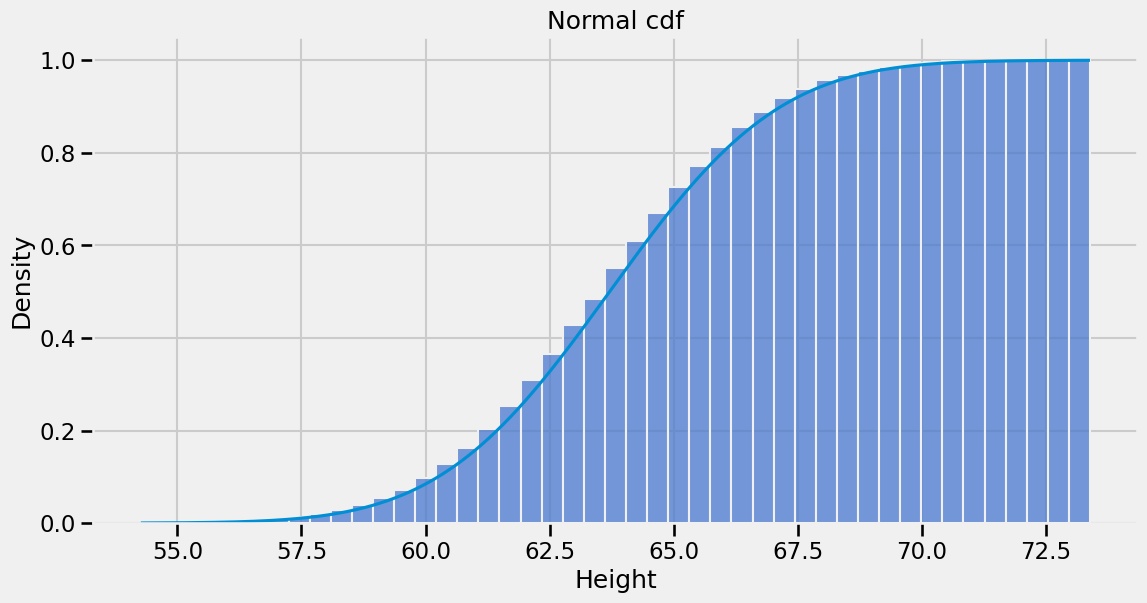

In [107]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

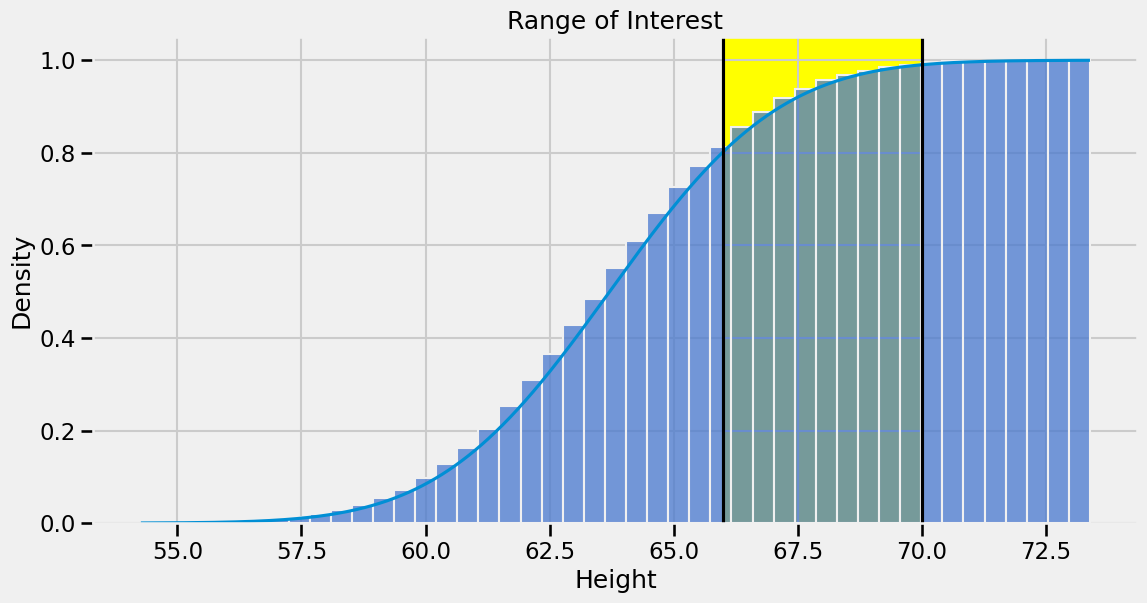

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest'); 

In [109]:
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.1878921154347697